In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import stats
import pylab as plt
import torch
import swyft
import torch
DEVICE = 'gpu' if torch.cuda.is_available() else 'cpu'

In [3]:
torch.manual_seed(0)
np.random.seed(0)

In [4]:
N = 10000  # Number of samples
z = np.random.rand(N, 3)*2 - 1
r = (z[:,0]**2 + z[:,1]**2 + 0.5*z[:, 0]*z[:,1]*z[:,2])**0.5
x = r.reshape(N, 1) + np.random.randn(N, 1)*0.05
samples = swyft.Samples(x = x, z = z)

In [5]:
class Network(swyft.SwyftModule):
    def __init__(self):
        super().__init__()
        self.learning_rate = 1e-3
        self.lre = swyft.lightning.LogRatioEstimator((0, 1, 2), '1d', num_features = 3, varname = 'z')
        self.s = torch.nn.LazyLinear(9)

    def forward(self, A, B):
        s = self.s(A['x']).reshape(-1, 3, 3)
        z = B['z']
        logratios1 = self.lre(s, z)
        return logratios1

In [6]:
trainer = swyft.SwyftTrainer(accelerator = DEVICE, precision = 64, max_epochs = 5)
dm = swyft.SwyftDataModule(samples)
network = Network()
trainer.fit(network, dm)

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/setup.py:200: UserWarning: MPS available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='mps', devices=1)`.
  rank_zero_warn(
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: ModelCheckpoint
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/utilities/model_summary/model_summary.py:411: UserWarning: A

Sanity Checking: 0it [00:00, ?it/s]

/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/Users/cweniger/opt/anaconda3/envs/native2/lib/python3.9/site-packages/pytorch_lightning/trainer/call.py:48: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


In [265]:
x0 = 0.5
obs = swyft.Sample(x = np.array([x0]))
prior_samples = swyft.Samples(z = np.random.rand(10_000, 3)*2-1)
predictions = trainer.infer(network, obs, prior_samples)

The following callbacks returned in `LightningModule.configure_callbacks` will override existing callbacks passed to Trainer: EarlyStopping, ModelCheckpoint


Predicting: 250it [00:00, ?it/s]

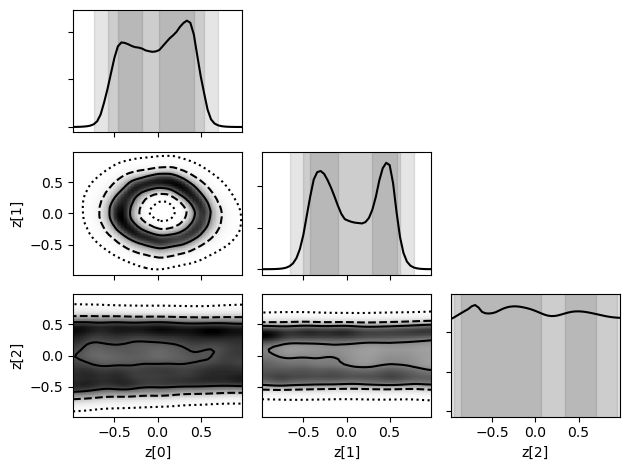

In [267]:
swyft.plot_corner(predictions, ['z[0]', 'z[1]', 'z[2]'], bins = 50, smooth_prior = True, smooth = 3);


1. Extract information from `predictions`. What lenght is it? What types of `LogRatioSamples` does it contain? What is the shape of `logratios` and `params`?

In [27]:
# Results go here

2. Provide only partial information when making inference plot.

In [28]:
# Results go here

3. Extend above example to estimate all marginal posteriors.

In [13]:
# Results go here